In [37]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c+=h
d2= a*b + c

print('d1', d1)
print('d2', d2)
print ('slope' , (d2-d1)/h)


d1 4.0
d2 4.0001
slope 0.9999999999976694


In [39]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
d = a*b +c
print(d)

4.0


In [305]:
import math
class Value:
    def __init__(self,data, _children=(),_op='', label=''):
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.grad = 0
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data, self._prev, self.label})"
    def __add__(self, other):
        out = Value(self.data + other.data,(self, other),'+')
        return out
    def __mul__(self,other):
        out = Value(self.data * other.data, (self,other),'*')
        return out
    def tanh(self):
        n = self.data
        t = (math.exp(2*n) -1 )/ (math.exp(2*n)+1)
        out = Value(t, (self,), 'tanh')
        return out

In [164]:
from graphviz import Digraph

def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
                # print( f"Value(data={v})")
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s| data %.4f | grad %.4f }" % (n.label,n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

In [247]:
a = Value(2.0,(),'','a')
b = Value(-3.0,(),'','b')
c = Value(10.0,(),'','c')

# a + b
e = a * b ; e.label ='e'
d = e +c ; d.label = 'd'


f = Value(-2.0,(),'','f')
L = d*f ; L.label = 'L'

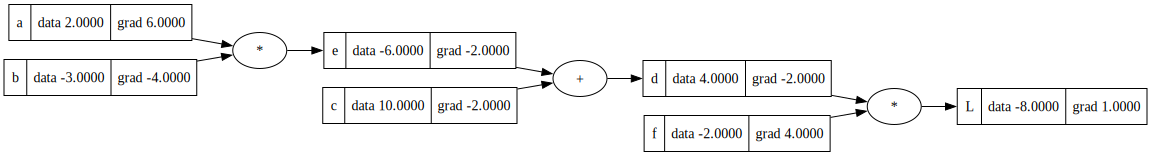

In [291]:
draw_dot(L)

# understand this
## if equation is e+c = d ,

## dd/de = 1 ; dd/dc = 1 .. y = mx+c ; what rate of chage of x affects y ; dy/dx = m (slope)


## End result derivate to the child most nodes !!!!!!!!!!!!!!!! (slowly think)
## grad is from base to end, not just next element.
## so start from end, with some value & backpropagate 

In [294]:
# Now start increasing
a.data +=.01 * a.grad
b.data +=.01 * b.grad
c.data +=.01 * c.grad
f.data +=.01 * f.grad

# run the forward pass , the equations 
# a + b
e = a * b 
d = e +c 
L = d*f 

print (L.data)

-7.286496


In [290]:
#L.grad = 1

# f.grad = d 
# d.grad = f

# f.grad = 4
# d.grad = -2

# DL/Dc , DL/de
# dd/dc 

#e.grad=1.0 * -2.0
#c.grad=1.0 * -2.0

# dl/da = dl/de * de/da
# dl/da = -2.0 * ((a*b)/a=> b)
# dl/da = -2.0 * -3.0 = 6.0

# converse dl/db = -2.0 * 2 = -4.0
# a.grad = 6.0
# b.grad = -4.0

In [ ]:
* What does gradient mean
* Smallest value that L can change
* DL/dl -> Smallest value by h 

In [293]:

def lol():
    h = 0.001

    a = Value(2.0,(),'','a')
    b = Value(-3.0,(),'','b')
    c = Value(10.0,(),'','c')
    e = a *b; e.label = 'e'
    d = e + c ; d.label = 'd'
    f = Value(-2.0,(),'','f')
    L = d*f ; L.label = 'L'
    L1= L.data

    a = Value(2.0,(),'','a')
    # a.data+=h
    b = Value(-3.0,(),'','b')
    # b.data+=h
    c = Value(10.0,(),'','c')
    #c.data+=h # if c changes by small value of h, how does the end result change. 
    e = a *b; e.label = 'e'
    d = e + c ; d.label = 'd'
 
    f = Value(-2.0 ,(),'','f')
    L = d*f ; L.label = 'L'
    L2= L.data 

    print((L2-L1)/h)
    print (L1)
    print (L2)
lol()

-3.9999999999995595
-8.0
-8.004


# Understanding the impact of previous value
d = c + e

dd/dc ? = 1 + 0 = 1
dd/de ? = 0 +1 = 1

f(x+h) - f(x )/ h

Influnece is easy to see through when c & e is additive.

# chain Rule
## Rate of change, bike run 2 times as human , car run 3 times as bike -> 2*3 = 6 
dz/dx = dz/dy * dy/dx

# Appplying
KNOW : 
dL/ dd 
dd/ dc 

Want :
dL/ dc = dL/dd * dd/dc


# Application
f.grad = d 
d.grad = f



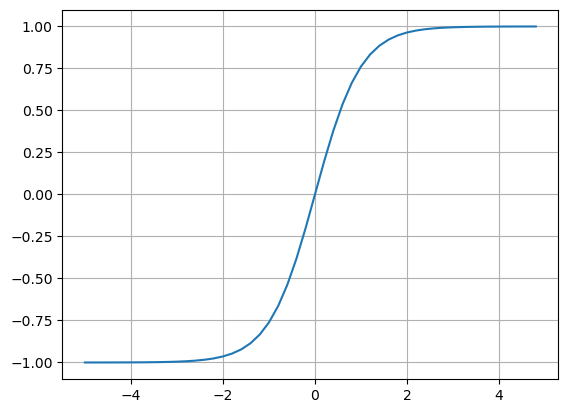

In [297]:
import matplotlib.pyplot as plt
import numpy as np


plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

# Derivate of o wrt to the original features or values.


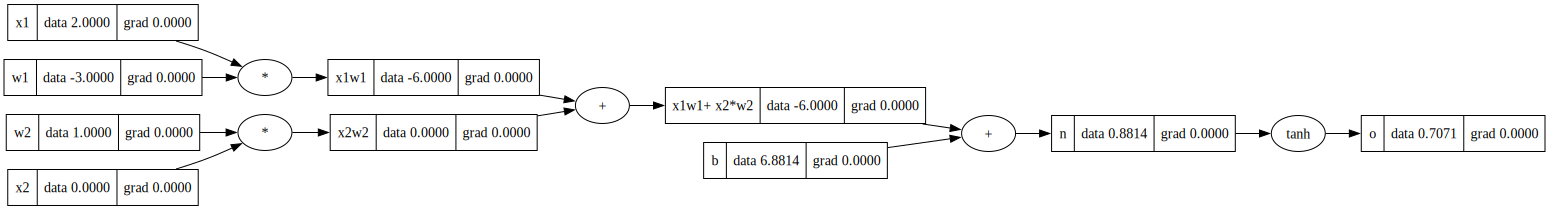

In [314]:
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

w1 = Value(-3.0, label= 'w1')
w2 = Value(1.0, label= 'w2')


b = Value(6.8813735870195432, label= 'b')

x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2 ; x1w1x2w2.label = 'x1w1+ x2*w2'
n = x1w1x2w2 + b ; n.label = 'n'

# add non-linear
o = n.tanh()
o.label = 'o'




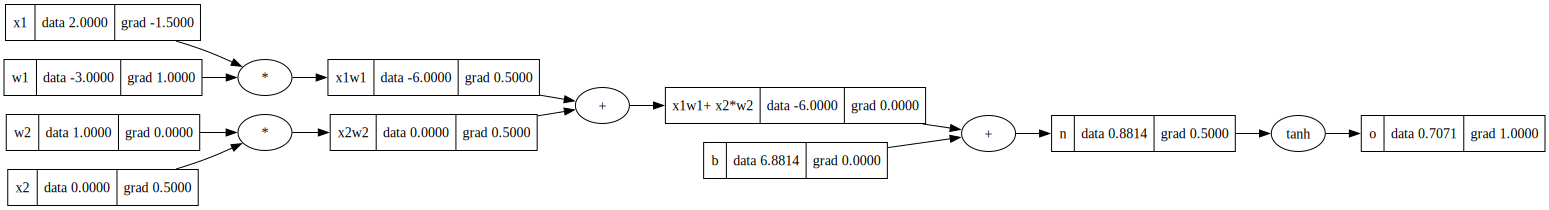

In [327]:
draw_dot(o)

In [326]:
#4 
# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad

# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad


In [322]:
#3 remember from previous one, sumsa re easy
x1w1.grad = .5 
x2w2.grad = .5


In [320]:
#2
n.grad = .5

In [316]:
#1
o.grad = 1.

In [319]:
# o = tanh
# d0/dn = = 1 - o**2 
1- o.data**2

0.4999999999999999